# Part 1 - Exploratory Data Analysis of Login Data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_json('logins.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
# The data is supposed to be from January 2014, but it starts in January 1970
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
# convert the year to 2014; Jan 1 is Wednesday in 2014, Thursday in 1970
df['login_time'] = df['login_time'].apply(lambda dt: dt.replace(year=2014))

In [6]:
df.head()

,login_time
0,2014-01-01 20:13:18
1,2014-01-01 20:16:10
2,2014-01-01 20:16:37
3,2014-01-01 20:16:36
4,2014-01-01 20:26:21


In [7]:
# Set the login_tima as index and create a count variable, to enable 15min grouping
df.set_index('login_time', inplace=True)
df.sort_index(inplace=True)
df['count'] = 1
df15 = df.resample('15min').count()

In [8]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 2014-01-01 20:00:00 to 2014-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


In [9]:
df15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


### Displaying a line plot of user logins reveals a cyclical pattern with a few spikes, but generally stable over time. There does not appear to be an overall growth trend.

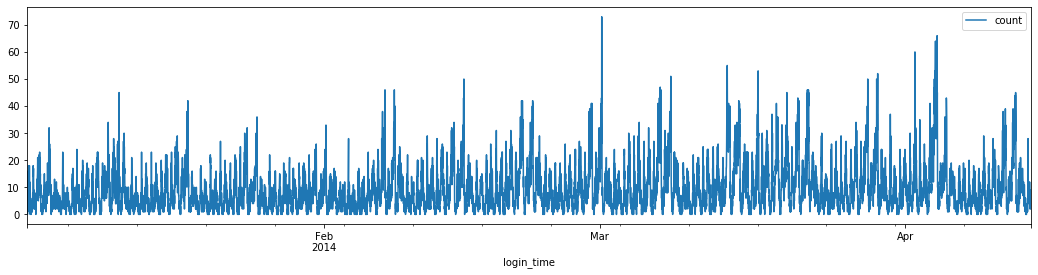

In [10]:
df15.plot(kind="line", figsize=(18, 4))
plt.show()

In [11]:
# Create columns for "Day of Week" and "Hour of Day"
df15['day_name'] = df15.index.map(lambda x:x.day_name())
df15['dayofweek'] = df15.index.map(lambda x:x.dayofweek)
df15['hour'] = df15.index.map(lambda x:x.hour)

In [12]:
df15.head()

,count,day_name,dayofweek,hour
login_time,,,,
2014-01-01 20:00:00,2,Wednesday,2,20
2014-01-01 20:15:00,6,Wednesday,2,20
2014-01-01 20:30:00,9,Wednesday,2,20
2014-01-01 20:45:00,7,Wednesday,2,20
2014-01-01 21:00:00,1,Wednesday,2,21


### The visualization shows higher activity heading into the weekend, then tapering off on Sunday.

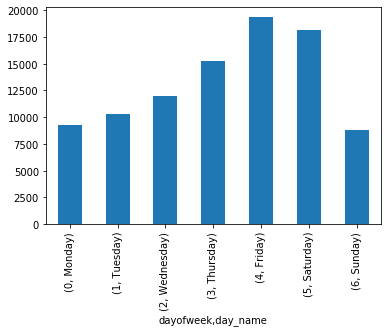

In [13]:
df15.groupby(["dayofweek", "day_name"])['count'].sum().plot(kind="bar")

### The hourly activitiy plot shows peak demand for the hours near midight, with another concentration in a tighter range arounf noon.

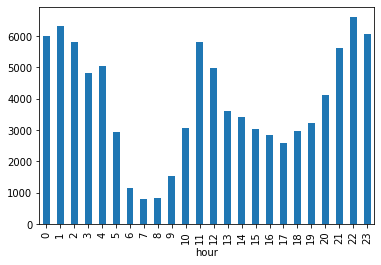

In [14]:
df15.groupby(["hour"])['count'].sum().plot(kind="bar")

### Grouping the hourly activity by day of week shows peak activity on Thursday nights heading into Friday morning and Friday nights heading into the wee hours of Saturday morning. 

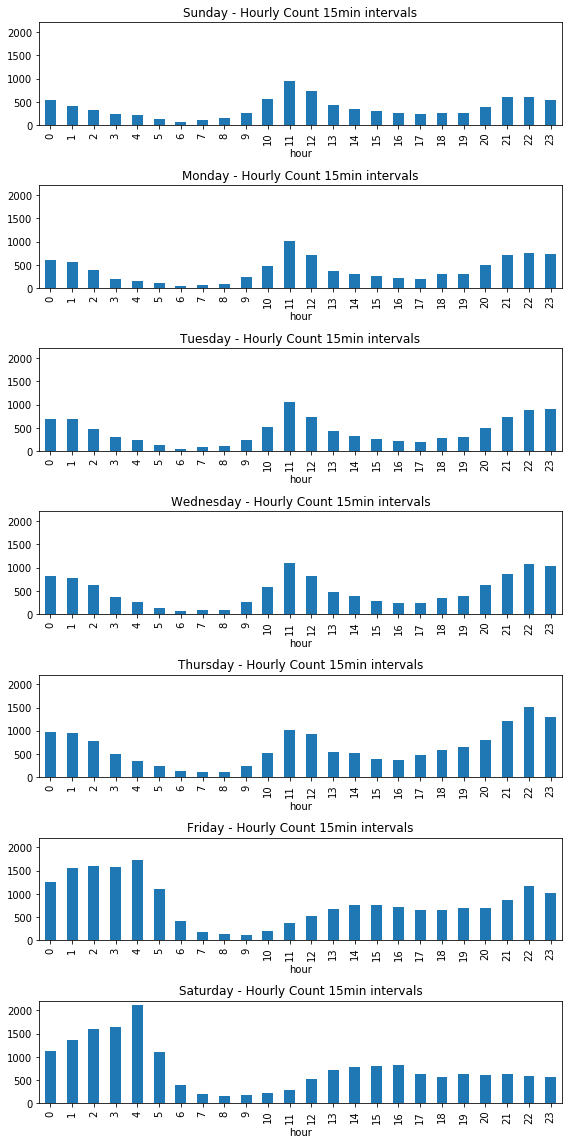

In [15]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7)\
= plt.subplots(nrows=7, ncols=1, sharey=True, figsize=(8,16))

ax1.set_title("Sunday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Sunday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax1)

ax2.set_title("Monday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Monday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax2)

ax3.set_title("Tuesday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Tuesday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax3)

ax4.set_title("Wednesday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Wednesday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax4)

ax5.set_title("Thursday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Thursday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax5)

ax6.set_title("Friday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Friday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax6)

ax7.set_title("Saturday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Saturday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax7)


fig.tight_layout()
plt.show()

# Part 2 - Experiment and Metrics Design#

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Answer: The key measure is whether drivers are able to increase their capacity, because the proposal is designed to take advantage of the complementary rhythms between cities. This implies that drivers are sitting idle when they could be operating in peak hours by going over the bridge to the other city. Using the data supplied for this exercise, the capacity can be measured by the level of logins combined with user data measuring number of trips and surge classification. It can be implied that data is available on driver pickup logs, rates, and the toll charges which are to be reimbursed. Although that data is not described, it would be the direct source of measuring whether drivers both increased their capacity and paid increased tolls.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment

Answer: The experiment is implemented by notifying drivers that tolls on the particular bridge will be reimbursed. The data that measures capacity would be analyzed to compare before and after results based on when the toll reimbursement policy is implemented.

b. what statistical test(s) you will conduct to verify the significance of the
observation

Answer: A t-test for statistical significance would validate whether any increase in driver capacity and toll expenses happened by chance or as a result of being in the implementation period. The significance of increased capacity can be tested in this manner, as well as the significance of toll increases, and correlation checked to see if these factors are related.

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

Answer: The results would be interpreted first to determine whether the increases are observed. Second, the results need to be interpreted in terms of profitability, or checking whether the toll reimbursement policy cost exceeds the revenue generated as a result. Based on the assumption of cricadian rhythms, combined with the login data showing peak login times and days, the expectation is that the greater capacity will also occur during the surge periods. Further, depending on the maturity of the market having other competitors, we are assuming that deploying the idle drivers to the surge markets will enable Ultimate to claim a larger share of the market that is already measured to exist based on logins. Features also need to be constructed to measure whether logins are resulting in rides provided by Ultimate, or whether logins are dropped, indicating that users are checking different providers and choosing the competition. That leads to another set of analysis to determine whether pricing or timeliness is a driving factor with respect to dropped logins. The recommendations would be based on tradeoffs observed which affect the immediate profitability, or whether gaining market share is a priority under the assumption that it leads to longer term profitability. The caveats are that if you are sizing up the competition, they may be doing the same. Not only would you need to consider other types of promotions or special pricing in combination, you may need to control for whether the competition is running a promotion that affects the efficacy of your own experiments.   

# Part 3 - Predictive Modeling

In [24]:
filename = 'ultimate_data_challenge.json'
with open(filename) as data_file:
    df2 = pd.DataFrame(json.load(data_file))

In [25]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [28]:
#Check for null values
df2.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [31]:
# Fill the null driver ratings with the average for the column, and null phone with "other"
df2['avg_rating_by_driver']= df2['avg_rating_by_driver'].fillna(int(np.mean(df2['avg_rating_by_driver'])))
df2['avg_rating_of_driver']= df2['avg_rating_of_driver'].fillna(int(np.mean(df2['avg_rating_of_driver'])))
df2['phone'] = df2['phone'].fillna('Other')

In [32]:
df2.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [33]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.503842,1.074764,8.849536,60.926084,5.796827,4.775030
std,3.792684,0.606987,0.222336,19.958811,37.081503,5.707357,0.448464
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


### Check the distribution of categorical variables with a pie chart. The "ultimate_black" classification seems interesting with 37% already using the premium service. The cities where users signed up seems relatively even, but it might mean more if more skewed. It could be interesting to see if phone type matters, especially if this represents the same distribution across the general population.


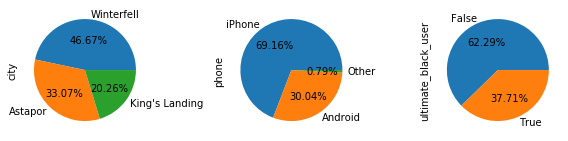

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8,6))

df2.ultimate_black_user.value_counts().plot(kind="pie", autopct='%.2f%%', ax=ax1)
df2.city.value_counts().plot(kind="pie", autopct='%.2f%%', ax=ax2)
df2.phone.value_counts().plot(kind="pie", autopct='%.2f%%', ax=ax3)

fig.tight_layout()
plt.show()

### There are a large number of users who appear to have signed up at the start of the period, but stopped taking trips soon after.

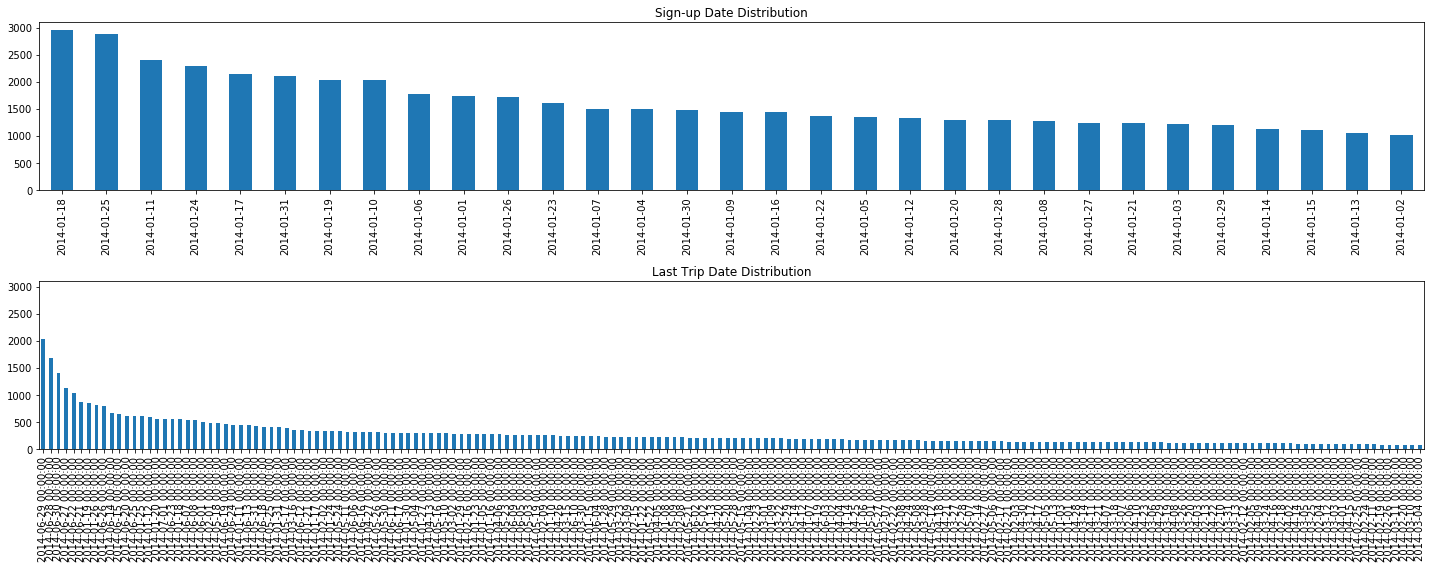

In [90]:
# Compare the dsitribution of sign-up date and last trip date on the same scale
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharey=True, figsize=(20,8))

ax1.set_title("Sign-up Date Distribution")
df2.signup_date.value_counts().plot(kind="bar", ax=ax1)

ax2.set_title("Last Trip Date Distribution")
df2.last_trip_date.value_counts().plot(kind="bar", ax=ax2)

fig.tight_layout()
plt.show()

## Convert Last Trip and SignUp to Date Format, then calculate "Active" User as last trip within last 30 days. Viusalize the distribution of Active Users grouped by Ultimate Black Users. 

In [99]:
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])
df2['signup_date'] = pd.to_datetime(df2['signup_date'])

In [98]:
df2['active'] = (max(df2['last_trip_date']) - df2['last_trip_date']) <= "30 days"

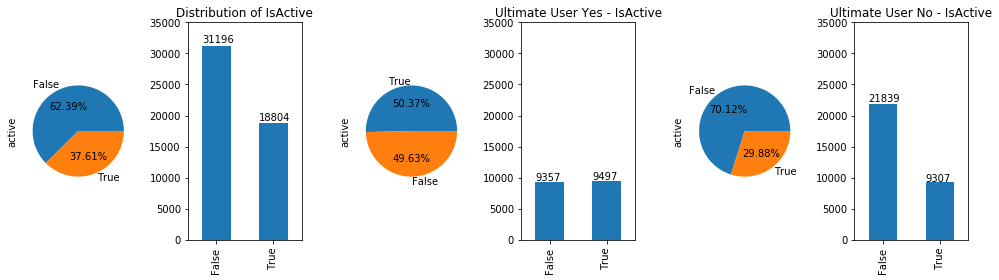

In [127]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize=(14,4))

ax2.set_title("Distribution of IsActive")
df2.active.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1 )
df2.active.value_counts().sort_index().plot(kind='bar', ax=ax2 )
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,35000)

ax4.set_title("Ultimate User Yes - IsActive")
df2[(df2['ultimate_black_user'] == 1)].active.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax3 )
df2[(df2['ultimate_black_user'] == 1)].active.value_counts().sort_index().plot(kind='bar', ax=ax4 )
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,35000)

ax6.set_title("Ultimate User No - IsActive")    
df2[(df2['ultimate_black_user'] == 0)].active.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax5 )
df2[(df2['ultimate_black_user'] == 0)].active.value_counts().sort_index().plot(kind='bar', ax=ax6 )
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,35000)
    
fig.tight_layout()    
plt.show()
